<a href="https://colab.research.google.com/github/arcursino/mulheres-na-TI/blob/master/mulheres_na_ti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O comando foi criado para usar o google drive como repositório dos arquivos a serem analisados.

In [0]:
from google.colab import files
#files.upload()

from google.colab import auth, drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Para analise de dados foi utilizado a biblioteca pandas.

In [0]:
import pandas as pd

O arquivo .csv disponibilizado pelo INEP usa o separador |, portanto é necessário acrescentar o parâmetro sep = "|".
A função df.append foi criada para criar uma coluna (CURSO)com os anos analisados (2009 à 2016) ao dataframe.

As informações estavam em arquivos separados e foi necessário unir as informações em apenas um dataframe. Foi utilizado o comando concat.


In [0]:
df2009 = pd.read_csv('/content/gdrive/My Drive/mulheres-na-ti/aluno-2009.csv', sep = "|")
df2009['ANO'] = pd.Series(2009, index=df2009.index)

df2010 = pd.read_csv('/content/gdrive/My Drive/mulheres-na-ti/aluno-2010.csv', sep = "|")
df2010['ANO'] = pd.Series(2010, index=df2010.index)

df2011 = pd.read_csv('/content/gdrive/My Drive/mulheres-na-ti/aluno-2011.csv', sep = "|")
df2011['ANO'] = pd.Series(2011, index=df2011.index)

df2012 = pd.read_csv('/content/gdrive/My Drive/mulheres-na-ti/aluno-2012.csv', sep = "|")
df2012['ANO'] = pd.Series(2012, index=df2012.index)

df2013 = pd.read_csv('/content/gdrive/My Drive/mulheres-na-ti/aluno-2013.csv', sep = "|")
df2013['ANO'] = pd.Series(2013, index=df2013.index)

df2014 = pd.read_csv('/content/gdrive/My Drive/mulheres-na-ti/aluno-2014.csv', sep = "|")
df2014['ANO'] = pd.Series(2014, index=df2014.index)

df2015 = pd.read_csv('/content/gdrive/My Drive/mulheres-na-ti/aluno-2015.csv', sep = "|")
df2015['ANO'] = pd.Series(2015, index=df2015.index)

df2016 = pd.read_csv('/content/gdrive/My Drive/mulheres-na-ti/aluno-2016.csv', sep = "|")
df2016['ANO'] = pd.Series(2016, index=df2016.index)


df = pd.concat([df2009, df2010, df2011, df2012, df2013, df2014, df2015, df2016])


No arquivo inicial as informações sobre sexo estavam definidos com 0 ou 1, foi necessário rodar uma função definindo com masculino e feminino.
Foi criada uma nova coluna sexo.

In [0]:
def define_sexo(sex):
    if sex == 0:
        return 'Masculino'
    elif sex == 1:
        return 'Feminino'

df['SEXO'] = df['IN_SEXO_ALUNO'].map(define_sexo)



O nome do curso estava em um arquivo diferente. Foi necessário puxar o nome do curso desse arquivo e fazer uma biblioteca para padronizar a escrita.

In [0]:
cc = dict()
with open('/content/gdrive/My Drive/mulheres-na-ti/codigo-curso.csv', 'r', encoding='latin-1') as f:
  for curso in f.readlines():
    cod, nome = curso.split('|')
    if cod == 'CO_CURSO':
      continue
    nome = nome.replace('\n', '')
    nome = nome.replace('Á', 'A').replace('Ã', 'A').replace('Â','A')
    nome = nome.replace('É', 'E').replace('Ê', 'E')
    nome = nome.replace('Í', 'I')
    nome = nome.replace('Ó', 'O').replace('Õ', 'O').replace('Ô', 'O')
    nome = nome.replace('Ú', 'U')
    nome = nome.replace('Ç', 'C')
    
    cc[int(cod)] = nome

definição do codigo do curso e adição da coluna curso

In [0]:
def define_curso(codigo):
  return cc[codigo]
   

df['CURSO'] = df['CO_CURSO'].map(define_curso)

A função head() para visualizar os primeiros itens do dataset

In [0]:
df.head()

,CO_CURSO,IN_SEXO_ALUNO,ANO,SEXO,CURSO
0,18471,1,2009,Feminino,ARQUITETURA E URBANISMO
1,40171,0,2009,Masculino,ENGENHARIA DE COMPUTACAO NATAL AUTOMACAO INDUS...
2,82227,1,2009,Feminino,ODONTOLOGIA
3,15474,0,2009,Masculino,ADMINISTRACAO
4,86830,1,2009,Feminino,ENFERMAGEM


 Para criar um novo dataframe apenas com as linhas dos cursos de TI.

In [0]:
data = (df.loc[df['CURSO'].isin(['INFORMATICA' , 'COMPUTACAO', 'ANALISE E DESENVOLVIMENTO DE SISTEMAS', 'TECNOLOGIA DA INFORMACAO'])])
data

,CO_CURSO,IN_SEXO_ALUNO,ANO,SEXO,CURSO
149,120479,0,2009,Masculino,ANALISE E DESENVOLVIMENTO DE SISTEMAS
1412,59659,1,2009,Feminino,COMPUTACAO
3482,128292,1,2009,Feminino,ANALISE E DESENVOLVIMENTO DE SISTEMAS
3600,128292,0,2009,Masculino,ANALISE E DESENVOLVIMENTO DE SISTEMAS
3938,121227,1,2009,Feminino,INFORMATICA
4174,121227,0,2009,Masculino,INFORMATICA
4496,68065,0,2009,Masculino,COMPUTACAO
5404,128292,0,2009,Masculino,ANALISE E DESENVOLVIMENTO DE SISTEMAS
5635,121227,0,2009,Masculino,INFORMATICA
6205,121227,0,2009,Masculino,INFORMATICA


O isnull analisa se existe algum campo vazio (null, NAN)

In [0]:
data.isnull().sum()

CO_CURSO         0
IN_SEXO_ALUNO    0
ANO              0
SEXO             0
CURSO            0
dtype: int64

In [0]:
data.head()

,CO_CURSO,IN_SEXO_ALUNO,ANO,SEXO,CURSO
149,120479,0,2009,Masculino,ANALISE E DESENVOLVIMENTO DE SISTEMAS
1412,59659,1,2009,Feminino,COMPUTACAO
3482,128292,1,2009,Feminino,ANALISE E DESENVOLVIMENTO DE SISTEMAS
3600,128292,0,2009,Masculino,ANALISE E DESENVOLVIMENTO DE SISTEMAS
3938,121227,1,2009,Feminino,INFORMATICA


Para saber os valores diferentes existente em cada coluna

In [0]:
data.nunique()

CO_CURSO         444
IN_SEXO_ALUNO      2
ANO                8
SEXO               2
CURSO              4
dtype: int64

Para saber os diferentes itens que estão listados no dataset

In [0]:
data['CURSO'].unique()

array(['ANALISE E DESENVOLVIMENTO DE SISTEMAS', 'COMPUTACAO',
       'INFORMATICA', 'TECNOLOGIA DA INFORMACAO'], dtype=object)

Para saber quantas vezes cada item diferente aparece.

In [0]:
data['CURSO'].value_counts()

ANALISE E DESENVOLVIMENTO DE SISTEMAS    273731
INFORMATICA                               73263
COMPUTACAO                                39623
TECNOLOGIA DA INFORMACAO                   3444
Name: CURSO, dtype: int64

A função crosstab é para cruzar as informações de curso e sexo.

In [0]:
pd.crosstab(data['CURSO'],data['SEXO'])

SEXO,Feminino,Masculino
CURSO,,
ANALISE E DESENVOLVIMENTO DE SISTEMAS,40605,233126
COMPUTACAO,12103,27520
INFORMATICA,19877,53386
TECNOLOGIA DA INFORMACAO,503,2941


Bliblioteca para gráfico.

In [0]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

Gráfico plotado do curso x sexo

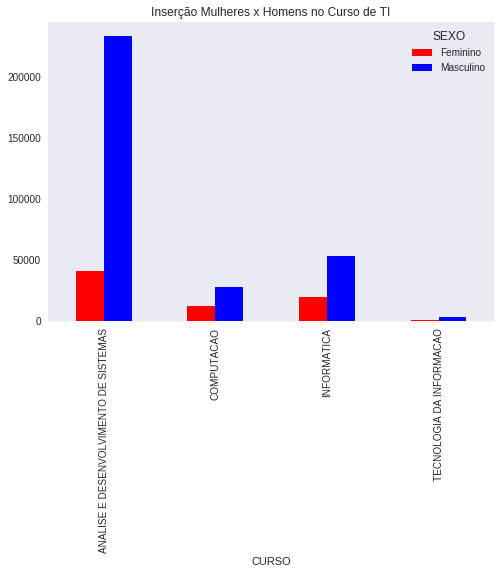

In [0]:
curso_sexo = pd.crosstab(data['CURSO'],data['SEXO'])
curso_sexo.plot(kind='bar',width=0.5, color=['red','blue'], title='Inserção Mulheres x Homens no Curso de TI' ,grid=False)

Informações sobre os anos e sexo.

In [0]:
pd.crosstab(data['ANO'],data['SEXO'])

SEXO,Feminino,Masculino
ANO,,
2009,3211,10016
2010,4525,14887
2011,6186,22132
2012,8231,31624
2013,10019,41002
2014,12570,55299
2015,13637,66068
2016,14709,75945


Gráfico plotado referente aos anos x sexo

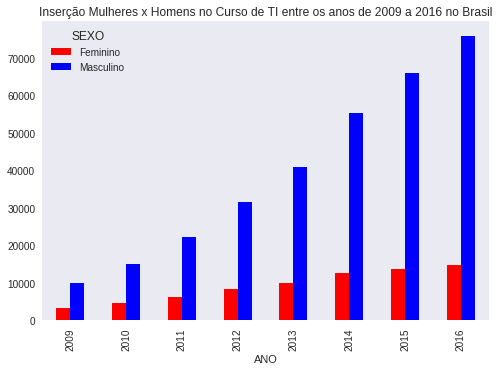

In [0]:
curso_ano = pd.crosstab(data['ANO'],data['SEXO'])
curso_ano.plot(kind='bar',width=0.5, color=['red','blue'], title='Inserção Mulheres x Homens no Curso de TI entre os anos de 2009 a 2016 no Brasil' ,grid=False)